# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error


boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

X = boston.drop('medv', axis=1).copy()
y = boston['medv'].copy()

boston.shape

(506, 14)

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [4]:
### Não há variáveis com conteúdos nulos, e todas são do tipo quantitativas. Tudo certo para a utilização no algoritmo. 

In [5]:
print("qtde nulos:")
print( boston.isnull().sum() )

boston.describe()

qtde nulos:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

#### Algumas variaveis com potencial preditivo são:
- "rm" com uma correlação negativa de 69,5%
- "lstat" com uma correlação negativa de 73,7%
- "ptratio" com uma correlação negativa de 50,7%

In [6]:
boston.corr()['medv']

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

### 3. Separe os dados em validação e teste

In [7]:
#70% para treino // 30% para teste

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.7)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [8]:
arvore_reg1 = DecisionTreeRegressor(max_depth=8)
arvore_reg2 = DecisionTreeRegressor(max_depth=2)

arvore_reg1.fit(x_treino, y_treino)
arvore_reg2.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

* Erro médio quadrático (MSE)

In [9]:
print("Erro médio dos quadrados: \n")

erro_medio_quad_a1 = mean_squared_error(y_treino, arvore_reg1.predict(x_treino))
erro_medio_quad_a2 = mean_squared_error(y_treino, arvore_reg2.predict(x_treino))

print(f"(dados de treino) Arvore 1 de profundidade 8: {erro_medio_quad_a1}")
print(f"(dados de treino) Arvore 2 de profundidade 2: {erro_medio_quad_a2} \n")


erro_medio_quad_a1 = mean_squared_error(y_teste, arvore_reg1.predict(x_teste))
erro_medio_quad_a2 = mean_squared_error(y_teste, arvore_reg2.predict(x_teste))

print(f"(dados de testes) Arvore 1 de profundidade 8: {erro_medio_quad_a1}")
print(f"(dados de testes) Arvore 2 de profundidade 2: {erro_medio_quad_a2}")


Erro médio dos quadrados: 

(dados de treino) Arvore 1 de profundidade 8: 1.5736247675594557
(dados de treino) Arvore 2 de profundidade 2: 31.27999680925729 

(dados de testes) Arvore 1 de profundidade 8: 32.263356320364856
(dados de testes) Arvore 2 de profundidade 2: 36.244225692130755


* Coeficiênte de determinação (R²)

In [10]:
print("Coeficiente de determinação: \n")

acur_a1 = arvore_reg1.score(x_treino, y_treino)
acur_a2 = arvore_reg2.score(x_treino, y_treino)

print(f"(base de treino) Arvore 1 de profundidade 8: {acur_a1}")
print(f"(base de treino) Arvore 2 de profundidade 2: {acur_a2} \n")


acur_a1 = arvore_reg1.score(x_teste, y_teste)
acur_a2 = arvore_reg2.score(x_teste, y_teste)

print(f"(base de testes) Arvore 1 de profundidade 8: {acur_a1}")
print(f"(base de teste) Arvore 2 de profundidade 2: {acur_a2}")


Coeficiente de determinação: 

(base de treino) Arvore 1 de profundidade 8: 0.9839604452659144
(base de treino) Arvore 2 de profundidade 2: 0.6811709937164865 

(base de testes) Arvore 1 de profundidade 8: 0.5883734385652124
(base de teste) Arvore 2 de profundidade 2: 0.5375841916328732


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

* A primeira árvore (que possuí profundidade max de 8) apresentou melhores resultados com os dados de treino, porém teve uma queda de performance de 42% com os dados de teste (de 99,5% para 57,4%).


* Por outro lado, a segunda árvore (com profundidade max de 2), apesar de ter apresentado um resultado inferior a primeira com os dados de treino, teve uma diferença de apenas 8% com os dados de treino (de 69.7% para 61,7%).


* Tudo se dá a entender que a primeira árvore "decorou" os dados de teste, e sofreu um overfitting. Portanto, a segunda árvore seria a escolha mais adequada.


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

* Aparentemente, a variavel mais importate no modelo é a "lstat"

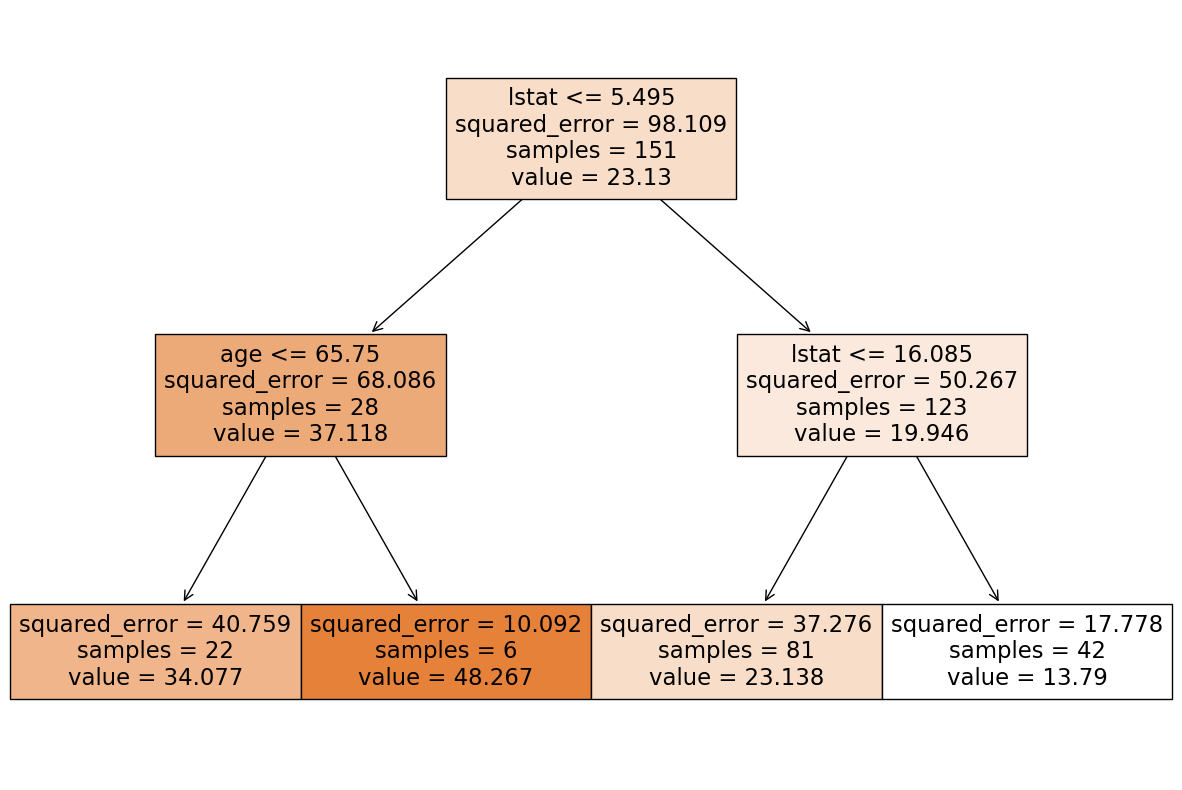

In [21]:
plt.figure(figsize=[15,10])

tree.plot_tree(decision_tree = arvore_reg2, 
               feature_names=boston.columns,
               filled=True)

plt.show()